<a href="https://colab.research.google.com/github/kaushikrahul1993/Natural-Language-Processing-Domain/blob/main/ML_TFIDF_Sentiment_Analysis_of_Twitter_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path=r"/content/drive/MyDrive/Colab Notebooks/RealTime Projects/May 2024- Project by Sundaram/10-Natural Language Processing Domain"

In [ ]:
import os
import sys
os.chdir(path)
sys.path.append(path)

In [ ]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_colwidth', 200)

In [ ]:
tweets = pd.read_csv('tweets.csv')
tweets.head(5)

id  label  \
0   1      0   
1   2      0   
2   3      0   
3   4      0   
4   5      1   

                                                                                                                                 tweet  
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone  
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/  
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu  
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/  
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!

In [ ]:
#### 0 refers to positive sentiment, 1 is negetive sentiment
#### let's map 0 as 1 and 1 as 0
tweets['label'] = tweets['label'].map({0:1, 1:0})

In [ ]:
tweets.head(5)

id  label  \
0   1      1   
1   2      1   
2   3      1   
3   4      1   
4   5      0   

                                                                                                                                 tweet  
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone  
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/  
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu  
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/  
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


# Basic Exploratory Data Analysis

In [ ]:
try:
  tweets.drop(columns=['id'], inplace=True)
except:
  pass

In [ ]:
tweets.isnull().sum()

label    0
tweet    0
dtype: int64

In [ ]:
tweets['label'].value_counts(normalize=True)

label
1    0.744192
0    0.255808
Name: proportion, dtype: float64

# Data Cleaning

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 5.5 MB/s eta 0:00:00


In [ ]:
import contractions

In [ ]:
contractions.fix("I'm bored")

'I am bored'

In [ ]:
tweet=tweets["tweet"][52]
tweet

'Love you baby boy #baby #boy #babyboy #muesli #hedgehog #pet him #iphone #iphone7… https://www.instagram.com/p/BZ9dWXJAMpT/'

In [ ]:
contractions.fix(tweet)

'Love you baby boy #baby #boy #babyboy #muesli #hedgehog #pet him #iphone #iphone7… https://www.instagram.com/p/BZ9dWXJAMpT/'

In [ ]:
tweets['tweet'].sample(10)

5257                                                                          I put in my password.. Why do I need to answer security questions?!?
6946                              Shoutout to Apple for deleting everything off my phone when I was just trying too update so DM ur numbers please
3445                               My phone be like:( iPhone is love but battery sucks :( #iphone #battery #low http://instagram.com/p/wDi185Lnn3/
2632               Fuck you #apple. You've made a phone that breaks if you sneeze on it, literally #SteveJobs #androidnextime #imgladstevejobsdied
6181                                                                           #apple is starting to #suck…it just doesn't work when I need it to!
5900    We would like to wish you an amazing day! Make every minute count #tls #today #iphone #accessories #news #life January 09, 2018 at 07:00AM
5638         New mobile phone!!^^ #sony #xperia #go #new #phone #instamobile #instaphone #instacool #instadaily http://instagram.com/p/bHG4ECu48H/
2921                                                          My iPod was being so stupid now I'm stuck here waiting for the restore to happen /.-
1115        We're awesome #girls #girl #cute #cool #fun #friends #bestfriends #bffs #my #iphone #like #follow #fol http://instagr.am/p/RBLwU3N-A8/
1946                                                         So when is America going to hack #Sony so we can see #TheInterviewMovie @SonyPictures
Name: tweet, dtype: object

In [ ]:
import re

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk_stopwords=set(stopwords.words('english'))

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)

In [ ]:
len(nltk_stopwords), len(sklearn_stopwords)

(198, 318)

In [ ]:
all_stopwords = nltk_stopwords.union(sklearn_stopwords)
len(all_stopwords)

397

In [ ]:
lemmat=WordNetLemmatizer()

In [ ]:
def tweet_cleaner(raw_tweet):
    """This function cleans the raw tweet """
    # substituting contractions
    cleaned_tweet = contractions.fix(raw_tweet)
    # remove the user mentions
    cleaned_tweet = re.sub("@[A-Za-z0-9]+","",cleaned_tweet)
    # remove hastags
    cleaned_tweet = re.sub("#","",cleaned_tweet)
    # remove hyperlinks
    cleaned_tweet=re.sub(r"http\S+","",cleaned_tweet)
    # retain only the alphabets (get rid of punct, special char)
    cleaned_tweet = re.sub(r"[^a-zA-Z]", " " , cleaned_tweet)
    cleaned_tweet = cleaned_tweet.lower().strip()
    cleaned_tweet=word_tokenize(cleaned_tweet)
    lemm_tweetword_list=[lemmat.lemmatize(token) for token in cleaned_tweet]
    return ' '.join(lemm_tweetword_list)


In [ ]:
tweets["cleaned_tweet"]=tweets["tweet"].apply(tweet_cleaner)

In [ ]:
tweets.head()

label  \
0      1   
1      1   
2      1   
3      1   
4      0   

                                                                                                                                 tweet  \
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone   
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/   
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu   
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/   
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!   

                                                                                                            cleaned_tweet  
0                         fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone  
1                                    finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias  
2                                 we love this would you go talk makememories unplug relax iphone smartphone wifi connect  
3                                              i am wired i know i am george i wa made that way iphone cute daventry home  
4  what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support

In [ ]:
vocab_raw = []
for tweet in tweets['tweet']:
    vocab_raw.extend(tweet.split())
print(vocab_raw)

['#fingerprint', '#Pregnancy', 'Test', 'https://goo.gl/h1MfQV', '#android', '#apps', '#beautiful', '#cute', '#health', '#igers', '#iphoneonly', '#iphonesia', '#iphone', 'Finally', 'a', 'transparant', 'silicon', 'case', '^^', 'Thanks', 'to', 'my', 'uncle', ':)', '#yay', '#Sony', '#Xperia', '#S', '#sonyexperias…', 'http://instagram.com/p/YGEt5JC6JM/', 'We', 'love', 'this!', 'Would', 'you', 'go?', '#talk', '#makememories', '#unplug', '#relax', '#iphone', '#smartphone', '#wifi', '#connect...', 'http://fb.me/6N3LsUpCu', "I'm", 'wired', 'I', 'know', "I'm", 'George', 'I', 'was', 'made', 'that', 'way', ';)', '#iphone', '#cute', '#daventry', '#home', 'http://instagr.am/p/Li_5_ujS4k/', 'What', 'amazing', 'service!', 'Apple', "won't", 'even', 'talk', 'to', 'me', 'about', 'a', 'question', 'I', 'have', 'unless', 'I', 'pay', 'them', '$19.95', 'for', 'their', 'stupid', 'support!', 'iPhone', 'software', 'update', 'fucked', 'up', 'my', 'phone', 'big', 'time', 'Stupid', 'iPhones', 'Happy', 'for', 'us', 

In [ ]:
len(vocab_raw)

133400

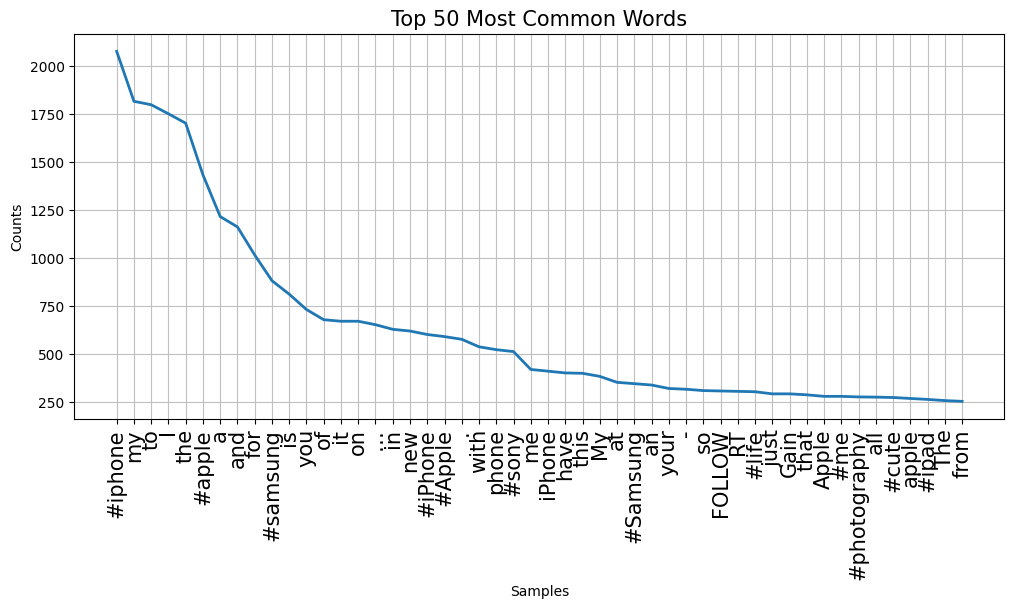

In [ ]:
import matplotlib.pyplot as plt
# Frequency distribution of the words
freq_dist_raw = nltk.FreqDist(vocab_raw)
plt.figure(figsize=(12,5))
plt.title("Top 50 Most Common Words", fontsize=15)
plt.xticks(fontsize=15)
freq_dist_raw.plot(50, cumulative=False)
plt.show()

In [ ]:
freq_dist_raw

FreqDist({'#iphone': 2077, 'my': 1817, 'to': 1799, 'I': 1752, 'the': 1703, '#apple': 1434, 'a': 1217, 'and': 1163, 'for': 1017, '#samsung': 883, ...})

# Freq Dist plot for cleaned_tweets

In [ ]:
vocab_clean = [token for tweet in tweets['cleaned_tweet'] for token in tweet.split()]
print(vocab_clean)

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'a', 'transparant', 'silicon', 'case', 'thanks', 'to', 'my', 'uncle', 'yay', 'sony', 'xperia', 's', 'sonyexperias', 'we', 'love', 'this', 'would', 'you', 'go', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'i', 'am', 'wired', 'i', 'know', 'i', 'am', 'george', 'i', 'wa', 'made', 'that', 'way', 'iphone', 'cute', 'daventry', 'home', 'what', 'amazing', 'service', 'apple', 'will', 'not', 'even', 'talk', 'to', 'me', 'about', 'a', 'question', 'i', 'have', 'unless', 'i', 'pay', 'them', 'for', 'their', 'stupid', 'support', 'iphone', 'software', 'update', 'fucked', 'up', 'my', 'phone', 'big', 'time', 'stupid', 'iphones', 'happy', 'for', 'u', 'instapic', 'instadaily', 'u', 'sony', 'xperia', 'xperiaz', 'new', 'type', 'c', 'charger', 'cable', 'uk', 'bay', 'amazon', 'etsy', 'new', 'year', 'rob', 'cross', 'toby', 'young

In [ ]:
len(vocab_clean)

129576

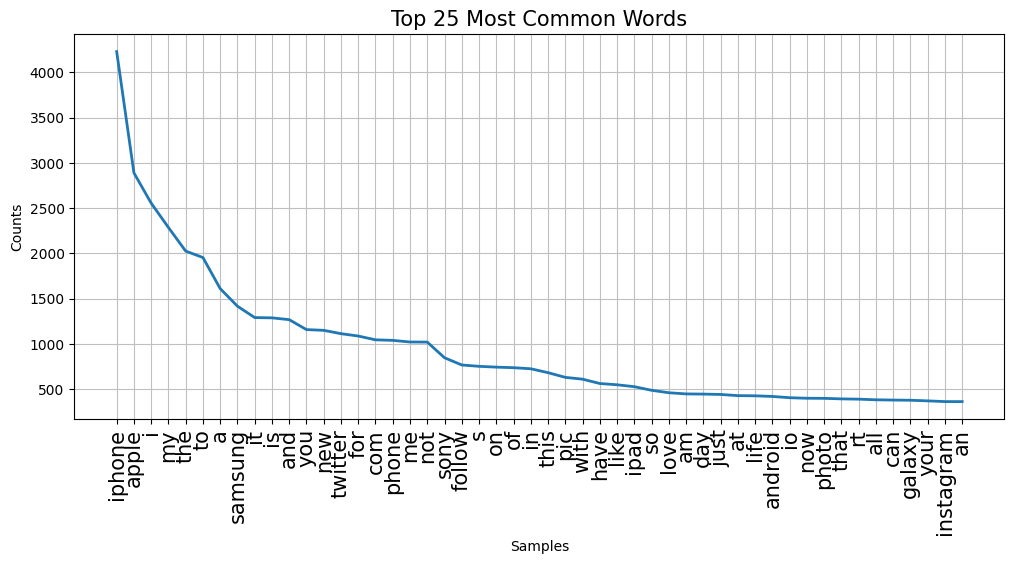

In [ ]:
import matplotlib.pyplot as plt
# Frequency distribution of the words
freq_dist_clean = nltk.FreqDist(vocab_clean)
plt.figure(figsize=(12,5))
plt.title("Top 25 Most Common Words", fontsize=15)
plt.xticks(fontsize=15)
freq_dist_clean.plot(50, cumulative=False)
plt.show()

In [ ]:
freq_dist_clean

FreqDist({'iphone': 4231, 'apple': 2890, 'i': 2555, 'my': 2286, 'the': 2025, 'to': 1954, 'a': 1610, 'samsung': 1416, 'it': 1290, 'is': 1287, ...})

In [ ]:
all_stopwords

{'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'ain',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'aren',
 "aren't",
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bill',
 'both',
 'bottom',
 'but',
 'by',
 'call',
 'can',
 'cannot',
 'cant',
 'co',
 'con',
 'could',
 'couldn',
 "couldn't",
 'couldnt',
 'cry',
 'd',
 'de',
 'describe',
 'detail',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'done',
 'down',
 'due',
 'during',
 'each',
 'eg',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'etc',
 'even',
 'ever',
 

# Freq Dist plot for cleaned tweets, after removing stopwords

In [ ]:
domain_stopwords = {'twitter','com','io','iO','IO','i0','instagram','facebook','rt'}
domain_stopwords

{'IO', 'com', 'facebook', 'i0', 'iO', 'instagram', 'io', 'rt', 'twitter'}

In [ ]:
all_stopwords = all_stopwords.union(domain_stopwords)
len(all_stopwords)

406

In [ ]:
def tweet_cleaner_with_stopwords(raw_tweet):
    """This function cleans the raw tweet """
    # substituting contractions
    cleaned_tweet = contractions.fix(raw_tweet)
    # remove the user mentions
    cleaned_tweet = re.sub("@[A-Za-z0-9]+","",cleaned_tweet)
    # remove hastags
    cleaned_tweet = re.sub("#","",cleaned_tweet)
    # remove hyperlinks
    cleaned_tweet=re.sub(r"http\S+","",cleaned_tweet)
    # retain only the alphabets (get rid of punct, special char, digits)
    cleaned_tweet = re.sub(r"[^a-zA-Z]", " " , cleaned_tweet)
    cleaned_tweet = cleaned_tweet.lower().strip()
    cleaned_tweet=word_tokenize(cleaned_tweet)
    lemm_tweetword_list=[lemmat.lemmatize(token) for token in cleaned_tweet]
    # remove stopwords from the new_sent
    nostop_lemm_tweetword_list= [token for token in lemm_tweetword_list if token not in all_stopwords]

    return ' '.join(nostop_lemm_tweetword_list)

In [ ]:
tweets["cleaned_tweets_without_stopwords"] = tweets['tweet'].apply(tweet_cleaner_with_stopwords)
tweets.head()

label  \
0      1   
1      1   
2      1   
3      1   
4      0   

                                                                                                                                 tweet  \
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone   
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/   
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu   
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/   
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!   

                                                                                                            cleaned_tweet  \
0                         fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone   
1                                    finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias   
2                                 we love this would you go talk makememories unplug relax iphone smartphone wifi connect   
3                                              i am wired i know i am george i wa made that way iphone cute daventry home   
4  what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support   

                                                                  cleaned_tweets_without_stopwords  
0  fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone  
1                       finally transparant silicon case thanks uncle yay sony xperia sonyexperias  
2                               love talk makememories unplug relax iphone smartphone wifi connect  
3                                               wired know george wa way iphone cute daventry home  
4                                    amazing service apple talk question unless pay stupid support

In [ ]:
vocab_nostop = [token for tweet in tweets['cleaned_tweets_without_stopwords'] for token in tweet.split()]
print(vocab_nostop)

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'wa', 'way', 'iphone', 'cute', 'daventry', 'home', 'amazing', 'service', 'apple', 'talk', 'question', 'unless', 'pay', 'stupid', 'support', 'iphone', 'software', 'update', 'fucked', 'phone', 'big', 'time', 'stupid', 'iphones', 'happy', 'u', 'instapic', 'instadaily', 'u', 'sony', 'xperia', 'xperiaz', 'new', 'type', 'c', 'charger', 'cable', 'uk', 'bay', 'amazon', 'etsy', 'new', 'year', 'rob', 'cross', 'toby', 'young', 'evemun', 'mcmafia', 'taylor', 'spectre', 'newyear', 'starting', 'recipe', 'technology', 'samsunggalaxys', 'iphonex', 'pic', 'pjiwq', 'wtc', 'bout', 'shopping', 'listening', 'music', 'iphone', 'justme', 'music', 'likeforl

In [ ]:
len(vocab_nostop)

85983

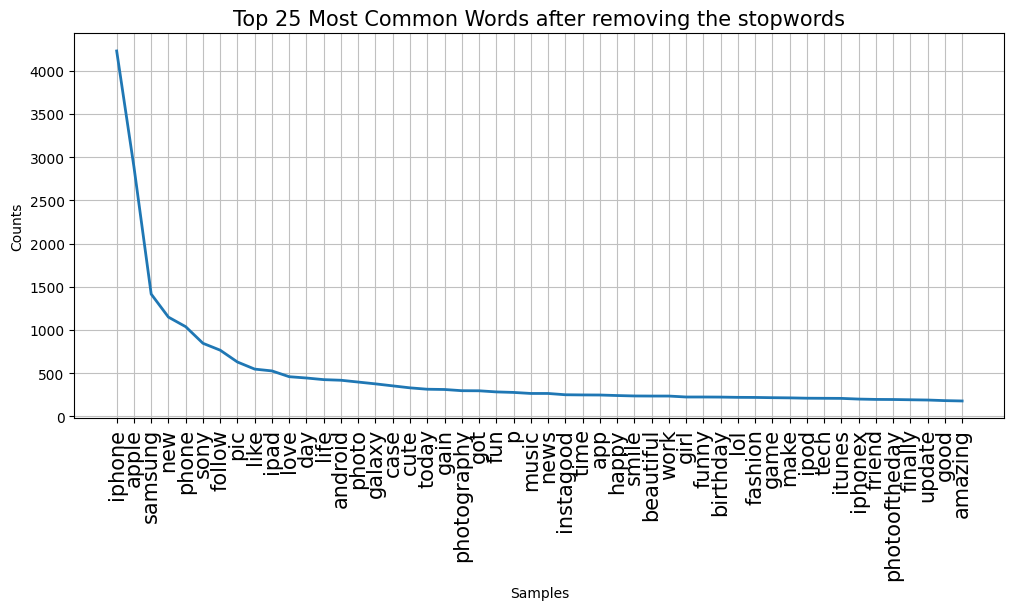

In [ ]:
import matplotlib.pyplot as plt
# Frequency distribution of the words
freq_dist_nostop = nltk.FreqDist(vocab_nostop)
plt.figure(figsize=(12,5))
plt.title("Top 25 Most Common Words after removing the stopwords", fontsize=15)
plt.xticks(fontsize=15)
freq_dist_nostop.plot(50, cumulative=False)
plt.show()

In [ ]:
freq_dist_nostop

FreqDist({'iphone': 4231, 'apple': 2890, 'samsung': 1416, 'new': 1149, 'phone': 1038, 'sony': 846, 'follow': 766, 'pic': 629, 'like': 547, 'ipad': 526, ...})

In [ ]:
#!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
text = """
The latest retail inflation data from the National Statistical Office yet again highlights the challenge in achieving durable price stability. Provisional estimates for year-on-year price gains in August show the headline rate based on the Consumer Price Index (CPI) quickened marginally to 3.65%, from July’s 3.60%, as a sharp rebound in vegetable inflation led to a wider acceleration in overall food price gains. Price gains in vegetables — the third-largest constituent of the Consumer Food Price Index — surged by more than 380 basis points last month to 10.7%, spurring food price inflation to 5.66%. Among vegetables, year-on-year inflation in the most widely consumed potato and onion still remained in the high double digits for a sixth and 13th month at 64% and 54%, respectively, a moderation from July’s levels notwithstanding. Other vegetables including carrot, palak and brinjal experienced a surge in price gains with all three posting double-digit inflation. Also, disinflation in the prices of pulses and cereals remained slow, with year-on-year price gains in the former still in the double digits for a 15th straight month at 13.6%, while the latter logged an inflation reading of 7.3%. Disconcertingly, food inflation in the rural areas rebounded to exceed 6%, and this at a time when stuttering private consumption is trying to regain momentum in the economically crucial agrarian hinterland. As an external member of the Monetary Policy Committee Shashanka Bhide noted in his comments at the RBI’s policy review meeting last month, “high food inflation would therefore hit growth adversely as it affects consumption”.

A durable disinflation to the RBI’s medium-term monetary policy goal of 4% headline retail inflation also faces other challenges, a key element being a resurgence in core inflation. The price gains measure, which strips out the more volatile food and fuel components, inched up to 3.38% after having snapped a 17-month decelerating streak in July. Based on responses from goods manufacturers polled for the monthly HSBC India Manufacturing PMI survey, HSBC observed this month that there was a “marked increase in prices charged for goods in August” with the rate of output-charge inflation the second-fastest in close to 11 years. Add to this the spatial and temporal volatility of the monsoon, and the outlook for price stability becomes even more muddied. RBI Governor Shaktikanta Das on Friday said that the last mile of disinflation was proving to be “challenging”. With policymakers still having to traverse a fair distance to ensure inflation does not undermine broader economic momentum, he reassuringly acknowledged that authorities “cannot afford to look the other way”.



"""
text

'\nThe latest retail inflation data from the National Statistical Office yet again highlights the challenge in achieving durable price stability. Provisional estimates for year-on-year price gains in August show the headline rate based on the Consumer Price Index (CPI) quickened marginally to 3.65%, from July’s 3.60%, as a sharp rebound in vegetable inflation led to a wider acceleration in overall food price gains. Price gains in vegetables — the third-largest constituent of the Consumer Food Price Index — surged by more than 380 basis points last month to 10.7%, spurring food price inflation to 5.66%. Among vegetables, year-on-year inflation in the most widely consumed potato and onion still remained in the high double digits for a sixth and 13th month at 64% and 54%, respectively, a moderation from July’s levels notwithstanding. Other vegetables including carrot, palak and brinjal experienced a surge in price gains with all three posting double-digit inflation. Also, disinflation in 

In [ ]:
wordcloud = WordCloud(stopwords = all_stopwords)
wordcloud.generate(text)

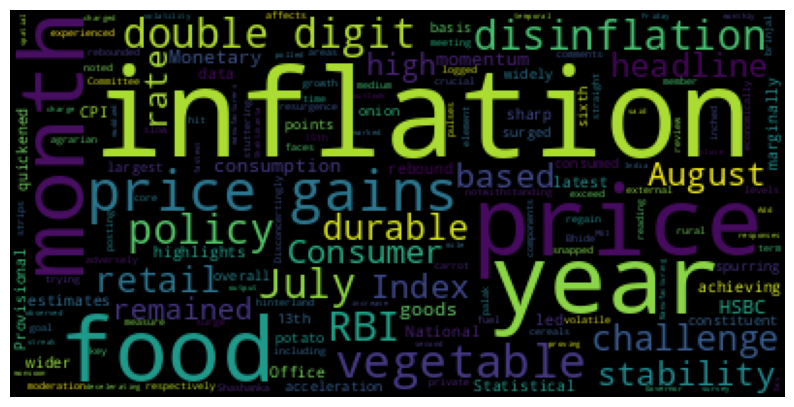

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
vocab_raw_str=' '.join(vocab_raw)
vocab_clean_str=' '.join(vocab_clean)
vocab_nostop_str=' '.join(vocab_nostop)

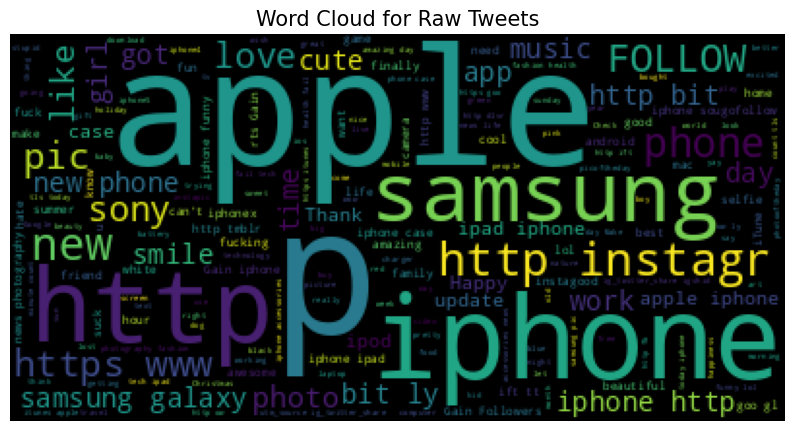

FreqDist({'#iphone': 2077, 'my': 1817, 'to': 1799, 'I': 1752, 'the': 1703, '#apple': 1434, 'a': 1217, 'and': 1163, 'for': 1017, '#samsung': 883, ...})

In [ ]:
wordcloud.generate(vocab_raw_str)
plt.figure(figsize=(10,8))
plt.title("Word Cloud for Raw Tweets", fontsize=15)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
freq_dist_raw

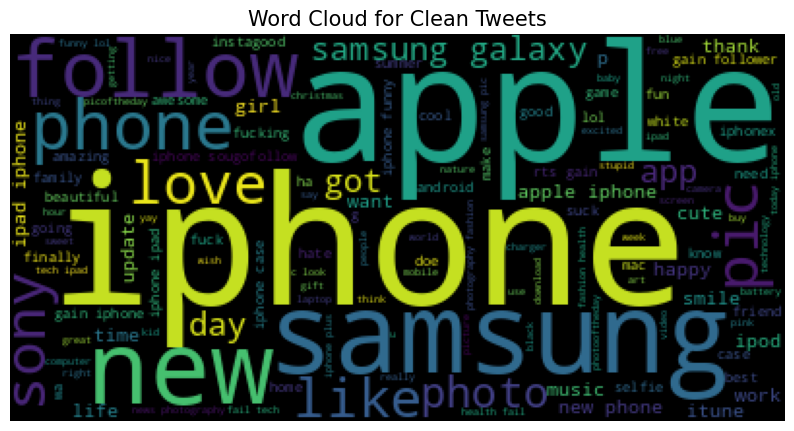

FreqDist({'iphone': 4231, 'apple': 2890, 'i': 2555, 'my': 2286, 'the': 2025, 'to': 1954, 'a': 1610, 'samsung': 1416, 'it': 1290, 'is': 1287, ...})

In [ ]:
wordcloud.generate(vocab_clean_str)
plt.figure(figsize=(10,8))
plt.title("Word Cloud for Clean Tweets", fontsize=15)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
freq_dist_clean

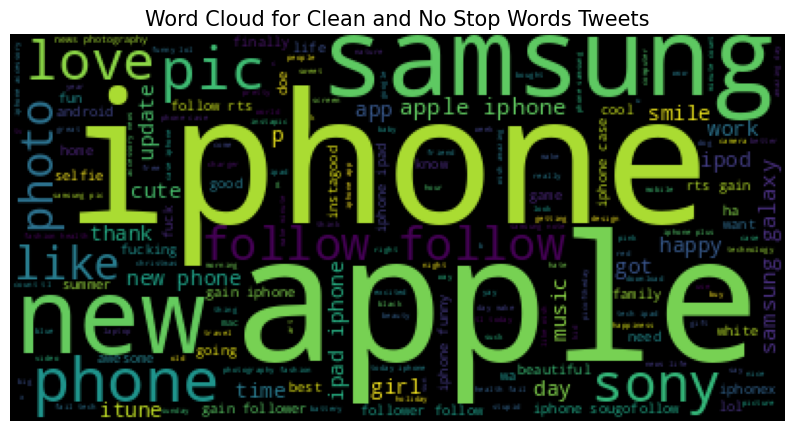

FreqDist({'iphone': 4231, 'apple': 2890, 'samsung': 1416, 'new': 1149, 'phone': 1038, 'sony': 846, 'follow': 766, 'pic': 629, 'like': 547, 'ipad': 526, ...})

In [ ]:
wordcloud.generate(vocab_nostop_str)
plt.figure(figsize=(10,8))
plt.title("Word Cloud for Clean and No Stop Words Tweets", fontsize=15)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
freq_dist_nostop

In [ ]:
# Saving the cleaned dataset for further text/sentiment analysis
tweets.to_pickle("cleaned_tweets_v1.pkl")

In [ ]:
tweets = pd.read_pickle('cleaned_tweets_v1.pkl')
tweets.head()

label  \
0      1   
1      1   
2      1   
3      1   
4      0   

                                                                                                                                 tweet  \
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone   
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/   
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu   
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/   
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!   

                                                                                                            cleaned_tweet  \
0                         fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone   
1                                    finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias   
2                                 we love this would you go talk makememories unplug relax iphone smartphone wifi connect   
3                                              i am wired i know i am george i wa made that way iphone cute daventry home   
4  what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support   

                                                                  cleaned_tweets_without_stopwords  
0  fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone  
1                       finally transparant silicon case thanks uncle yay sony xperia sonyexperias  
2                               love talk makememories unplug relax iphone smartphone wifi connect  
3                                               wired know george wa way iphone cute daventry home  
4                                    amazing service apple talk question unless pay stupid support

In [ ]:
positive_tweets = tweets[tweets['label']==1]
positive_tweets.head()

label  \
0      1   
1      1   
2      1   
3      1   
6      1   

                                                                                                                                 tweet  \
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone   
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/   
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu   
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/   
6                                 Happy for us .. #instapic #instadaily #us #sony #xperia #xperiaZ https://instagram.com/p/z9qGfWlvj7/   

                                                                                     cleaned_tweet  \
0  fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone   
1             finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias   
2          we love this would you go talk makememories unplug relax iphone smartphone wifi connect   
3                       i am wired i know i am george i wa made that way iphone cute daventry home   
6                                            happy for u instapic instadaily u sony xperia xperiaz   

                                                                  cleaned_tweets_without_stopwords  
0  fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone  
1                       finally transparant silicon case thanks uncle yay sony xperia sonyexperias  
2                               love talk makememories unplug relax iphone smartphone wifi connect  
3                                               wired know george wa way iphone cute daventry home  
6                                                happy u instapic instadaily u sony xperia xperiaz

In [ ]:
neg_tweets = tweets[tweets['label']==0]
neg_tweets.head()

label  \
4       0   
5       0   
10      0   
11      0   
12      0   

                                                                                                                           tweet  \
4   What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!   
5                                                              iPhone software update fucked up my phone big time Stupid iPhones   
10  hey #apple when you make a new ipod dont make it a new color or .2inches thinner make it not crash every five fuckin minite.   
11    Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade   
12          Contemplating giving in to the iPhone bandwagon simply because #Cellcom has no new Androids #depressing #IDontWantTo   

                                                                                                               cleaned_tweet  \
4     what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support   
5                                                          iphone software update fucked up my phone big time stupid iphones   
10  hey apple when you make a new ipod do not make it a new color or inch thinner make it not crash every five fuckin minite   
11            ha not heavy machinery but it doe what i need it to really dropped the ball with that design drinkyourhaterade   
12           contemplating giving in to the iphone bandwagon simply because cellcom ha no new android depressing idontwantto   

                                                              cleaned_tweets_without_stopwords  
4                                amazing service apple talk question unless pay stupid support  
5                                  iphone software update fucked phone big time stupid iphones  
10                hey apple make new ipod make new color inch thinner make crash fuckin minite  
11                    ha heavy machinery doe need really dropped ball design drinkyourhaterade  
12  contemplating giving iphone bandwagon simply cellcom ha new android depressing idontwantto

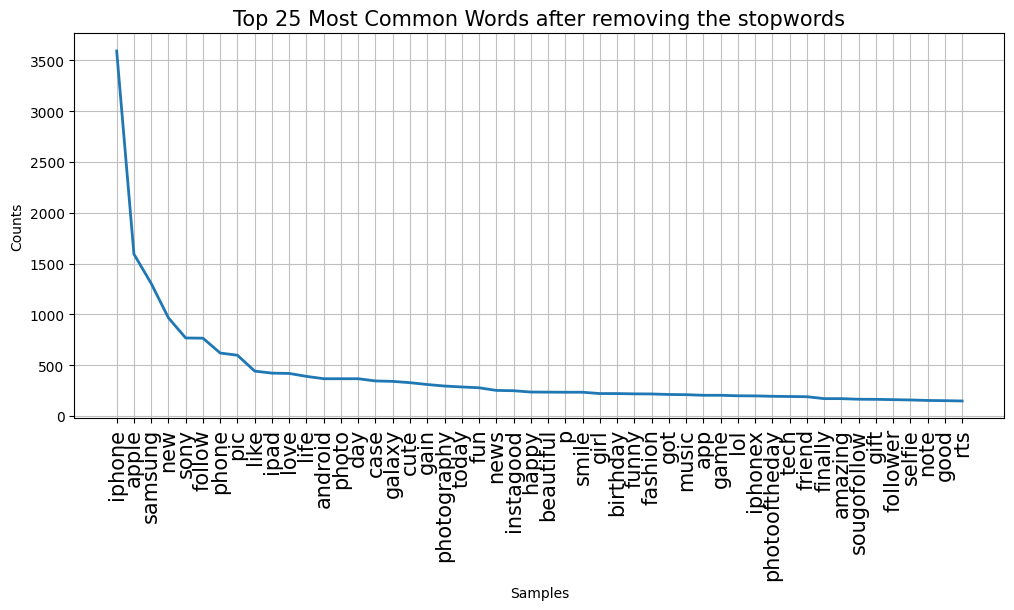

In [ ]:
positive_vocab = [token for tweet in positive_tweets['cleaned_tweets_without_stopwords'] for token in tweet.split()]
positive_freq = nltk.FreqDist(positive_vocab)
plt.figure(figsize=(12,5))
plt.title("Top 25 Most Common Words after removing the stopwords", fontsize=15)
plt.xticks(fontsize=15)
positive_freq.plot(50, cumulative=False)
plt.show()

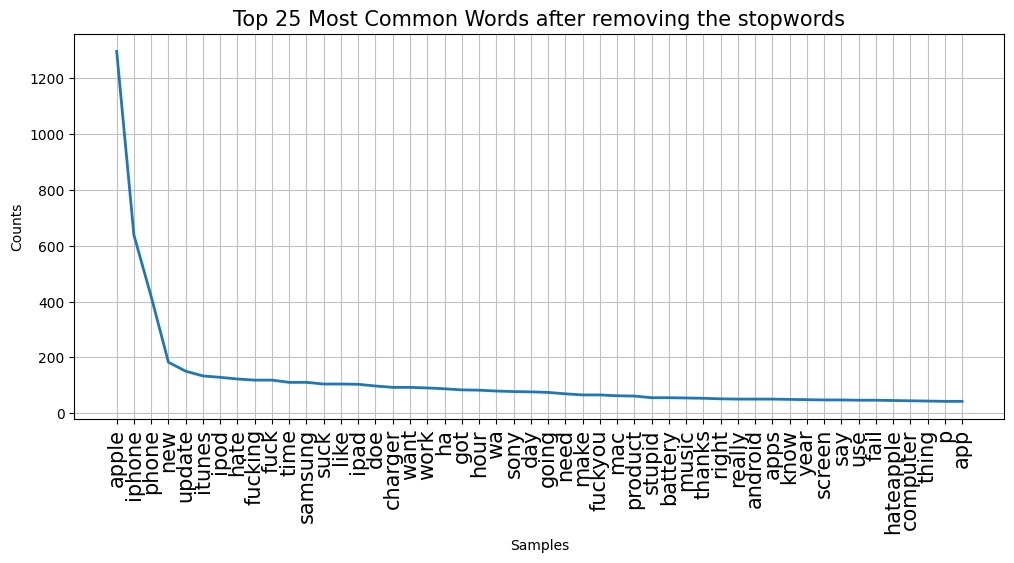

In [ ]:
neg_vocab = [token for tweet in neg_tweets['cleaned_tweets_without_stopwords'] for token in tweet.split()]
neg_freq = nltk.FreqDist(neg_vocab)
plt.figure(figsize=(12,5))
plt.title("Top 25 Most Common Words after removing the stopwords", fontsize=15)
plt.xticks(fontsize=15)
neg_freq.plot(50, cumulative=False)
plt.show()

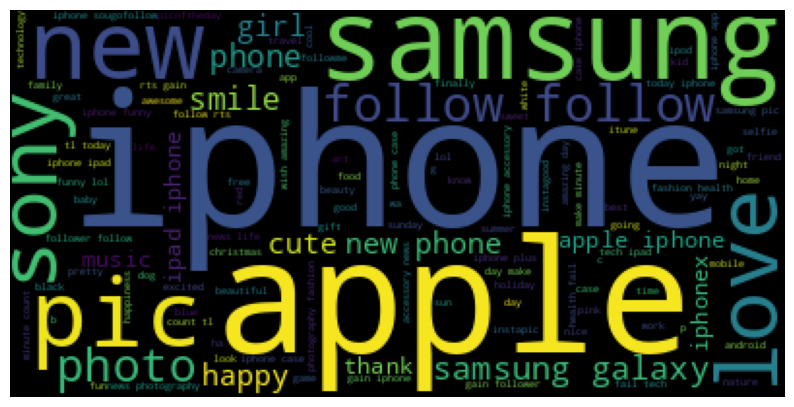

FreqDist({'apple': 1296, 'iphone': 638, 'phone': 418, 'new': 183, 'update': 151, 'itunes': 134, 'ipod': 129, 'hate': 123, 'fucking': 119, 'fuck': 119, ...})

In [ ]:
p_vocab = ' '.join(positive_vocab)
pos_wordcloud = WordCloud()
pos_wordcloud.generate(p_vocab)
plt.figure(figsize=(10,8))
plt.imshow(pos_wordcloud)
plt.axis('off')
plt.show()
neg_freq

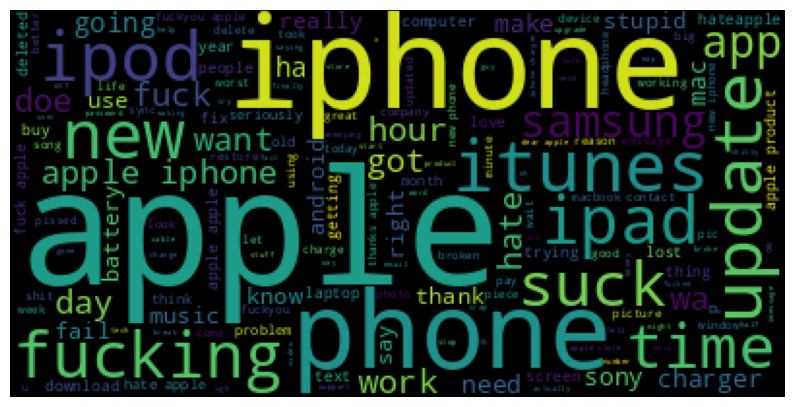

FreqDist({'apple': 1296, 'iphone': 638, 'phone': 418, 'new': 183, 'update': 151, 'itunes': 134, 'ipod': 129, 'hate': 123, 'fucking': 119, 'fuck': 119, ...})

In [ ]:
neg_vocab = ' '.join(neg_vocab)
neg_wordcloud = WordCloud()
neg_wordcloud.generate(neg_vocab)
plt.figure(figsize=(10,8))
plt.imshow(neg_wordcloud)
plt.axis('off')
plt.show()
neg_freq

In [ ]:
# bow, tf-idf, ngram - basic language model
# word2vec, glove, fasttext - distributed language model
# transformers, bert, gpt - large language model (context model)

In [ ]:
tweets.head()

label  \
0      1   
1      1   
2      1   
3      1   
4      0   

                                                                                                                                 tweet  \
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone   
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/   
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu   
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/   
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!   

                                                                                                            cleaned_tweet  \
0                         fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone   
1                                    finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias   
2                                 we love this would you go talk makememories unplug relax iphone smartphone wifi connect   
3                                              i am wired i know i am george i wa made that way iphone cute daventry home   
4  what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support   

                                                                  cleaned_tweets_without_stopwords  
0  fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone  
1                       finally transparant silicon case thanks uncle yay sony xperia sonyexperias  
2                               love talk makememories unplug relax iphone smartphone wifi connect  
3                                               wired know george wa way iphone cute daventry home  
4                                    amazing service apple talk question unless pay stupid support

In [ ]:
x = tweets['tweet']
y = tweets['label']

In [ ]:
# split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer()

In [ ]:
tfidf_array=tfidf.fit_transform(x_train["cleaned_tweets_without_stopwords"])
tfidf_array=tfidf_array.toarray()
tfidf_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print(tfidf.vocabulary_) # index number of word alphabetical order

{'im': 8662, 'so': 15763, 'fucking': 6884, 'done': 5414, 'with': 18661, 'the': 16907, 'apple': 1955, 'iphone': 9114, 'never': 12051, 'again': 1528, 'lost': 10667, 'everything': 6063, 'fuck': 6873, 'you': 19235, 'die': 5230, 'this': 17014, 'is': 9238, 'me': 11167, 'my': 11791, 'sweet': 16513, 'case': 3939, 'cute': 4849, 'iphoneography': 9172, 'http': 8324, 'instagr': 8900, 'am': 1735, 'icww3': 8492, 'bamboo': 2480, 'vocation': 18157, 'newyear': 12122, 'trip': 17368, 'thailand': 16878, 'khaoko': 9846, 'a6000': 1302, 'ilce6000': 8626, 'sony': 15854, 'vsco': 18196, 'snapspeed': 15745, 'instagram': 8902, 'com': 4414, 'xcr4x4r6af': 18909, 'tv': 17474, 'given': 7327, 'to': 17158, 'today': 17167, 'samsung': 14962, '42inch': 776, 'livingroom': 10512, 'home': 8177, 'black': 3076, 'and': 1804, 'white': 18550, 'yay': 19117, 'thankyou': 16894, 'hyrjtdgofb': 8405, 'soft': 15800, 'grip': 7589, 'battery': 2562, 'for': 6694, 'powerplus': 13613, 'ii': 8609, 'perfect': 13133, 'fits': 6528, 'snugly': 1576

In [ ]:
print(tfidf.get_feature_names_out()) # index number of word dataframe order

['00' '000' '002' ... '𝓇𝑒𝒶𝒹' '𝓌𝑒𝓁𝓁' '𝓌𝓂𝒶𝓃']


In [ ]:
tfidf_df=pd.DataFrame(tfidf_array, columns=tfidf.get_feature_names_out())
tfidf_df

00  000  002  004  0051  007  00am  00pm   01  010111  ...  안녕하세요  \
0     0.0  0.0  0.0  0.0   0.0  0.0   0.0   0.0  0.0     0.0  ...    0.0   
1     0.0  0.0  0.0  0.0   0.0  0.0   0.0   0.0  0.0     0.0  ...    0.0   
2     0.0  0.0  0.0  0.0   0.0  0.0   0.0   0.0  0.0     0.0  ...    0.0   
3     0.0  0.0  0.0  0.0   0.0  0.0   0.0   0.0  0.0     0.0  ...    0.0   
4     0.0  0.0  0.0  0.0   0.0  0.0   0.0   0.0  0.0     0.0  ...    0.0   
...   ...  ...  ...  ...   ...  ...   ...   ...  ...     ...  ...    ...   
6331  0.0  0.0  0.0  0.0   0.0  0.0   0.0   0.0  0.0     0.0  ...    0.0   
6332  0.0  0.0  0.0  0.0   0.0  0.0   0.0   0.0  0.0     0.0  ...    0.0   
6333  0.0  0.0  0.0  0.0   0.0  0.0   0.0   0.0  0.0     0.0  ...    0.0   
6334  0.0  0.0  0.0  0.0   0.0  0.0   0.0   0.0  0.0     0.0  ...    0.0   
6335  0.0  0.0  0.0  0.0   0.0  0.0   0.0   0.0  0.0     0.0  ...    0.0   

      제야의종   종각  타종행사  𝒸𝓇𝑒𝒶𝓉𝓊𝓇𝑒  𝒹𝒶𝓃𝑔𝑒𝓇𝓊𝓈   𝒾𝓈  𝓇𝑒𝒶𝒹  𝓌𝑒𝓁𝓁  𝓌𝓂𝒶𝓃  
0      0.0  0.0   0.0       0.0       0.0  0.0   0.0   0.0   0.0  
1      0.0  0.0   0.0       0.0       0.0  0.0   0.0   0.0   0.0  
2      0.0  0.0   0.0       0.0       0.0  0.0   0.0   0.0   0.0  
3      0.0  0.0   0.0       0.0       0.0  0.0   0.0   0.0   0.0  
4      0.0  0.0   0.0       0.0       0.0  0.0   0.0   0.0   0.0  
...    ...  ...   ...       ...       ...  ...   ...   ...   ...  
6331   0.0  0.0   0.0       0.0       0.0  0.0   0.0   0.0   0.0  
6332   0.0  0.0   0.0       0.0       0.0  0.0   0.0   0.0   0.0  
6333   0.0  0.0   0.0       0.0       0.0  0.0   0.0   0.0   0.0  
6334   0.0  0.0   0.0       0.0       0.0  0.0   0.0   0.0   0.0  
6335   0.0  0.0   0.0       0.0       0.0  0.0   0.0   0.0   0.0  

[6336 rows x 19664 columns]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
lr = LogisticRegression()
nb_multinomial = MultinomialNB()
nb_bernoulli = BernoulliNB()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
ada = AdaBoostClassifier()
svc = SVC()
estimators=[('lr', lr), ('nb_multinomial', nb_multinomial),
            ('nb_bernoulli', nb_bernoulli), ('rf', rf), ('gb', gb), ('ada', ada), ('svc', svc)]
vc = VotingClassifier(estimators=estimators, voting='hard')
sc=StackingClassifier(estimators=estimators, final_estimator=lr)

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#df["col"].apply(fun) or #df.iloc[num].apply(fun)--.apply(fun) take whole pd.Series as input sent each
#value in fun complie all return value as array for each input return whole array.

#Hence
#df.apply(lambda x:x.apply(fun))--works first column wise x=df['col] then x.apply same as above
#finally return dataframe not array since applied on all columns  alternative to df.applymap()

#df.applymap(fun) or df.applymap(lambda x:x*2) will send each value and save retun as df and then return

# FunctionTransformer(func) here func should receive an pd.series/np.arrary and rerurn np.array or pd.series but our
#takes an single value and return single value so
#FunctionTransformer(lambda x:x.apply(func)) here x is pd.series then .apply() over it caluated and
#worked like above
#finaly at the last stage in model input shoud be np.array only tfidf will ouput np.array only if not convert it


In [ ]:
preprocessor = imbPipeline([("Clean_Text",FunctionTransformer(lambda x:x.apply(tweet_cleaner_with_stopwords)))])

In [ ]:
preprocessor.fit_transform(x_train)

7544                                                   fucking apple iphone fucking lost fuck apple die apple
3918                                                                     sweet case cute iphoneography iphone
7839                                    bamboo vocation newyear trip thailand khaoko ilce sony vsco snapspeed
5673                                     tv given today samsung inch livingroom home black white yay thankyou
5966                           soft grip battery case iphone powerplus ii perfect case fit snugly distributor
                                                        ...                                                  
710                                          gain follower follow follow follow rts gain iphone sougofollow u
7253                                               excited laptop day short month working iphone window apple
1888                                        telling auto correct fucking life iphone apple onlysometimes love
4969                                                 thank apple great customer service iphone problem solved
5041    fly butterfly fly butterfly animal enjoy ar arkit augmentedreality madewitharkit apple pic oryktnsw n
Name: tweet, Length: 6336, dtype: object

In [ ]:
preprocessor = imbPipeline([
    ("Clean_Text",FunctionTransformer(lambda x:x.apply(tweet_cleaner_with_stopwords))),
 ("TFIDF Encoder",tfidf)
 ])
preprocessor.fit_transform(x_train)

<6336x13573 sparse matrix of type '<class 'numpy.float64'>'
	with 63768 stored elements in Compressed Sparse Row format>

In [ ]:
model_pipeline = imbPipeline([
    ("Clean_Text",FunctionTransformer(lambda x:x.apply(tweet_cleaner_with_stopwords))),
 ("TFIDF Encoder",tfidf),("model",lr)
 ])
model_pipeline.fit(x_train,y_train)

Pipeline(steps=[('Clean_Text',
                 FunctionTransformer(func=<function <lambda> at 0x7e7c3446b420>)),
                ('TFIDF Encoder', TfidfVectorizer()),
                ('model', LogisticRegression())])

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

In [ ]:
y_pred_train = model_pipeline.predict(x_train)
train_pred_proba = model_pipeline.predict_proba(x_train)[:,1]
test_predict_proba = model_pipeline.predict_proba(x_test)[:,1]
y_pred_test = model_pipeline.predict(x_test)
train_score = accuracy_score(y_train, y_pred_train)
test_score = accuracy_score(y_test, y_pred_test)
train_auc_score=roc_auc_score(y_train, train_pred_proba)
test_auc_score=roc_auc_score(y_test, test_predict_proba)
class_report_train = classification_report(y_train, y_pred_train)
class_report_test = classification_report(y_test, y_pred_test)
print("Train Score:", train_score, "Test Score:", test_score)
print()
print("Train AUC Score:", train_auc_score, "Test AUC Score:", test_auc_score)
print()
print("Train Classification Report:\n", class_report_train,"\n",
      "Test Classification Report:\n", class_report_test)
print()
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train),"\n",
      "Test Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Train Score: 0.9182449494949495 Test Score: 0.8415404040404041

Train AUC Score: 0.9785377890793097 Test AUC Score: 0.9223489251196347

Train Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.75      0.82      1621
           1       0.92      0.98      0.95      4715

    accuracy                           0.92      6336
   macro avg       0.92      0.86      0.89      6336
weighted avg       0.92      0.92      0.92      6336
 
 Test Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.55      0.64       405
           1       0.86      0.94      0.90      1179

    accuracy                           0.84      1584
   macro avg       0.81      0.75      0.77      1584
weighted avg       0.83      0.84      0.83      1584


Train Confusion Matrix:
 [[1220  401]
 [ 117 4598]] 
 Test Confusion Matrix:
 [[ 223  182]
 [  69 1110]]


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score

In [ ]:
classifier_list=[lr, nb_multinomial, nb_bernoulli, rf, gb, ada, svc, vc, sc]

In [ ]:
metrics_df=pd.DataFrame(columns=['Model', 'Train_Precision', 'Test_Precision', 'Train_F1', 'Test_F1'])
for classifier in classifier_list:
  model_pipeline = imbPipeline([
    ("Clean_Text",FunctionTransformer(lambda x:x.apply(tweet_cleaner_with_stopwords))),
 ("TFIDF Encoder",tfidf),("model",classifier)
 ])
  model_pipeline.fit(x_train,y_train)
  y_pred_train = model_pipeline.predict(x_train)
  y_pred_test = model_pipeline.predict(x_test)
  train_precision = precision_score(y_train, y_pred_train)
  test_precision = precision_score(y_test, y_pred_test)
  f1_train = f1_score(y_train, y_pred_train)
  f1_test = f1_score(y_test, y_pred_test)
  metrics_df.loc[len(metrics_df)] = [classifier, train_precision, test_precision, f1_train, f1_test]
metrics_df.sort_values(by=['Test_Precision','Test_F1'], ascending=False)

Model  \
8  StackingClassifier(estimators=[('lr', LogisticRegression()),\n                               ('nb_multinomial', MultinomialNB()),\n                               ('nb_bernoulli', BernoulliNB()),\n...   
3  (DecisionTreeClassifier(max_features='sqrt', random_state=266795996), DecisionTreeClassifier(max_features='sqrt', random_state=260427250), DecisionTreeClassifier(max_features='sqrt', random_state=...   
2                                                                                                                                                                                            BernoulliNB()   
6                                                                                                                                                                                                    SVC()   
7  VotingClassifier(estimators=[('lr', LogisticRegression()),\n                             ('nb_multinomial', MultinomialNB()),\n                             ('nb_bernoulli', BernoulliNB()),\n      ...   
0                                                                                                                                                                                     LogisticRegression()   
1                                                                                                                                                                                          MultinomialNB()   
4  ([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n                      random_state=RandomState(MT19937) at 0x7E7C90A2EC40)], [DecisionTreeRegressor(criterion='friedman_mse', max_de...   
5  (DecisionTreeClassifier(max_depth=1, random_state=53831083), DecisionTreeClassifier(max_depth=1, random_state=414897659), DecisionTreeClassifier(max_depth=1, random_state=1771838096), DecisionTree...   

   Train_Precision  Test_Precision  Train_F1   Test_F1  
8         0.996587        0.904643  0.993725  0.914885  
3         0.999576        0.880383  0.999576  0.907522  
2         0.957506        0.880096  0.954246  0.906173  
6         0.992786        0.876494  0.992575  0.903862  
7         0.950123        0.859568  0.967628  0.900202  
0         0.919784        0.859133  0.946675  0.898422  
1         0.916617        0.840859  0.950143  0.898024  
4         0.868738        0.834698  0.920299  0.888977  
5         0.816101        0.803419  0.852482  0.838605

In [ ]:
model_pipeline = imbPipeline([
    ("Clean_Text",FunctionTransformer(lambda x:x.apply(tweet_cleaner_with_stopwords))),
 ("TFIDF Encoder",tfidf),("model",sc)
 ])
model_pipeline.fit(x_train,y_train)
y_pred_train = model_pipeline.predict(x_train)
train_pred_proba = model_pipeline.predict_proba(x_train)[:,1]
test_predict_proba = model_pipeline.predict_proba(x_test)[:,1]
y_pred_test = model_pipeline.predict(x_test)
train_score = accuracy_score(y_train, y_pred_train)
test_score = accuracy_score(y_test, y_pred_test)
train_auc_score=roc_auc_score(y_train, train_pred_proba)
test_auc_score=roc_auc_score(y_test, test_predict_proba)
class_report_train = classification_report(y_train, y_pred_train)
class_report_test = classification_report(y_test, y_pred_test)
print("Train Score:", train_score, "Test Score:", test_score)
print()
print("Train AUC Score:", train_auc_score, "Test AUC Score:", test_auc_score)
print()
print("Train Classification Report:\n", class_report_train,"\n",
      "Test Classification Report:\n", class_report_test)
print()
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train),"\n",
      "Test Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


Train Score: 0.9908459595959596 Test Score: 0.8718434343434344

Train AUC Score: 0.9994273202394606 Test AUC Score: 0.9361333626530122

Train Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1621
           1       1.00      0.99      0.99      4715

    accuracy                           0.99      6336
   macro avg       0.99      0.99      0.99      6336
weighted avg       0.99      0.99      0.99      6336
 
 Test Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74       405
           1       0.90      0.93      0.92      1179

    accuracy                           0.87      1584
   macro avg       0.84      0.82      0.83      1584
weighted avg       0.87      0.87      0.87      1584


Train Confusion Matrix:
 [[1606   15]
 [  43 4672]] 
 Test Confusion Matrix:
 [[ 288  117]
 [  86 1093]]


In [ ]:
from sklearn.metrics import roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

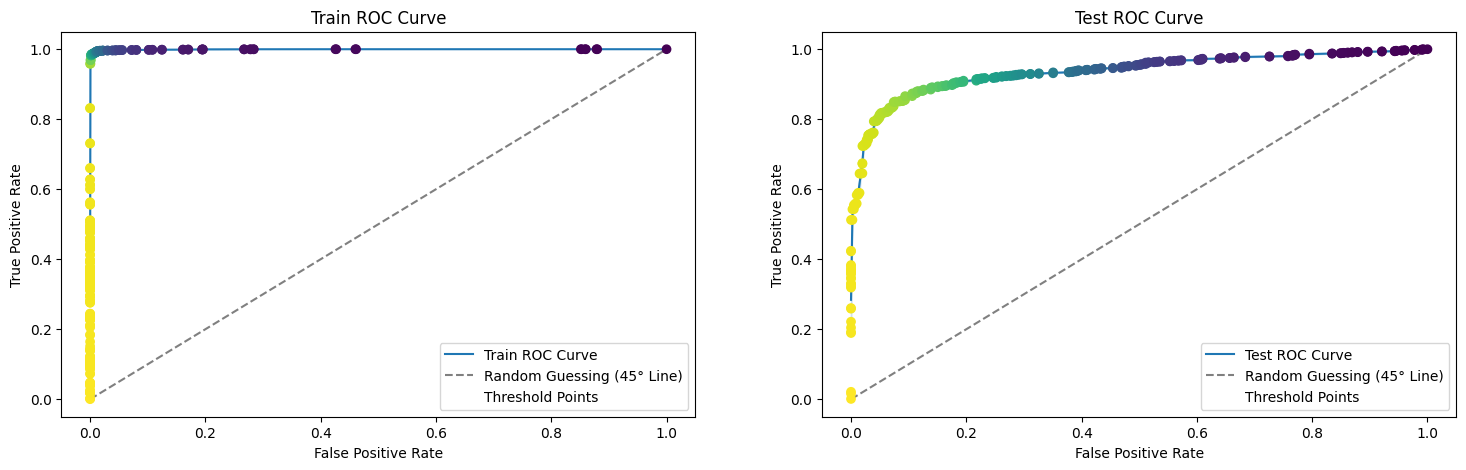

In [ ]:
train_roc_curve = roc_curve(y_train, train_pred_proba)
test_roc_curve = roc_curve(y_test, test_predict_proba)
plt.subplots(1,2,figsize=(18,5))

plt.subplot(1, 2, 1)
sns.lineplot(x=train_roc_curve[0], y=train_roc_curve[1], label="Train ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guessing (45° Line)")  # 45-degree line
plt.scatter(train_roc_curve[0], train_roc_curve[1], c=train_roc_curve[2], cmap='viridis', label='Threshold Points', zorder=5)  # Threshold points
plt.title("Train ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1, 2, 2)
sns.lineplot(x=test_roc_curve[0], y=test_roc_curve[1], label="Test ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guessing (45° Line)")  # 45-degree line
plt.scatter(test_roc_curve[0], test_roc_curve[1], c=test_roc_curve[2], cmap='viridis', label='Threshold Points', zorder=5)  # Threshold points
plt.title("Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()